In [5]:
import warnings
warnings.filterwarnings("ignore")

import snapatac2 as snap
import anndata as ad
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
import bin.utils as myutils
import polars as pl

In [2]:
sc.logging.print_header()

Package,Version
anndata,0.10.9
pandas,2.0.3
scanpy,1.11.1
numpy,1.26.4
matplotlib,3.10.1
Component,Info
Python,"3.11.10 (main, Sep 27 2024, 06:09:18) [GCC 12.2.0]"
OS,Linux-5.15.0-138-generic-x86_64-with-glibc2.36
CPU,256 logical CPU cores
GPU,No GPU found


In [3]:
os.getcwd()

'/nfs/cellgeni/pasham/projects/2504.ovary_atac/src/ovary'

In [50]:
#data = snap.read('../../data.lustre/atac/results2/subset_adatas/_dataset.h5ads')
data = sc.read_h5ad('../../data.lustre/atac/results2/subset_adatas/_dataset.h5ads')

In [51]:
data.obs

,sample,leiden,celltype
index,,,
HCA_P_GON_CZI13941760:CCGTACTCATGCGCTG-1,HCA_P_GON_CZI13941760,12,Stroma_InnCor
HCA_P_GON_CZI13941760:GAGATTCCAACGCACC-1,HCA_P_GON_CZI13941760,12,Stroma_InnCor
HCA_P_GON_CZI13941760:AACCTTTGTCTAAGAA-1,HCA_P_GON_CZI13941760,6,PV_SMC_Arterial
HCA_P_GON_CZI13941760:CCGAAGCAGAGTCCGA-1,HCA_P_GON_CZI13941760,12,Stroma_InnCor
HCA_P_GON_CZI13941760:ACAGAAATCGCCTTAC-1,HCA_P_GON_CZI13941760,12,Stroma_OutCor_Foll
...,...,...,...
HCA_P_GON_CZI13941759:AAACTGCGTGAATGTA-1,HCA_P_GON_CZI13941759,1,Stroma_InnCor
HCA_P_GON_CZI13941759:CAATCCCGTACGGATG-1,HCA_P_GON_CZI13941759,1,Stroma_X
HCA_P_GON_CZI13941759:ACCGGGTCATGCGACC-1,HCA_P_GON_CZI13941759,4,Stroma_X


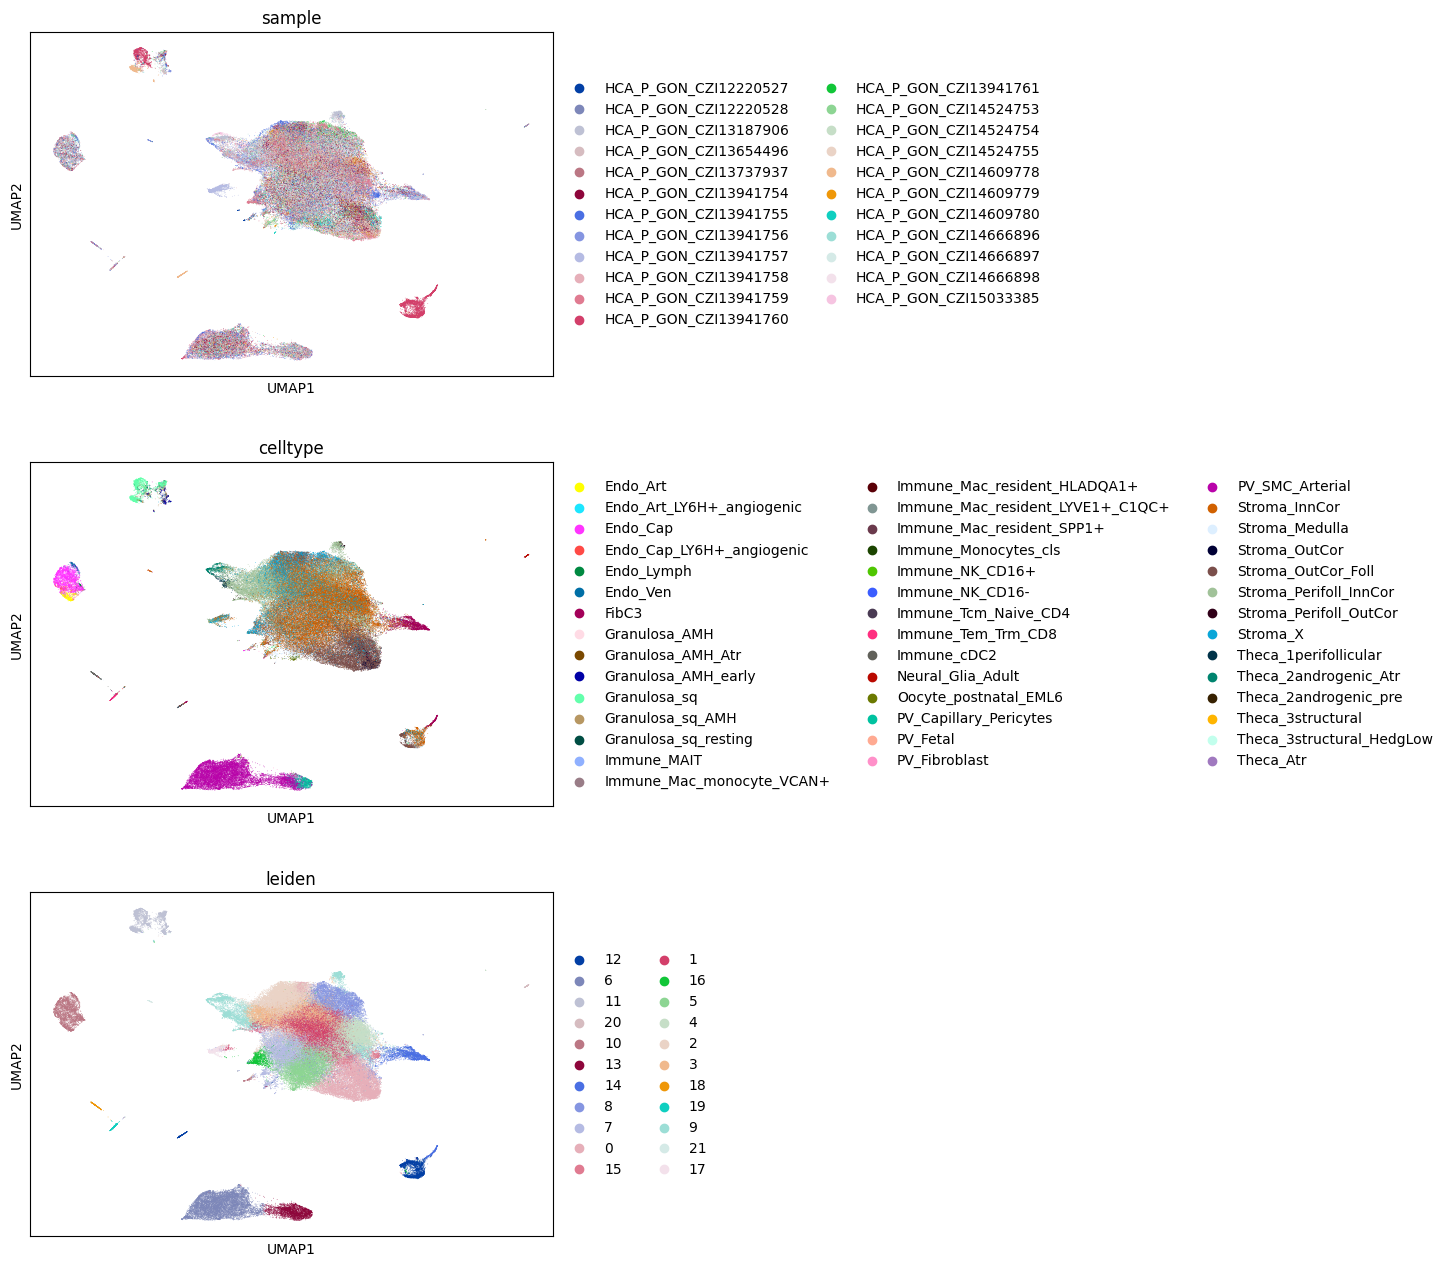

In [54]:
sc.pl.umap(data,color=['sample','celltype','leiden'],ncols=1)

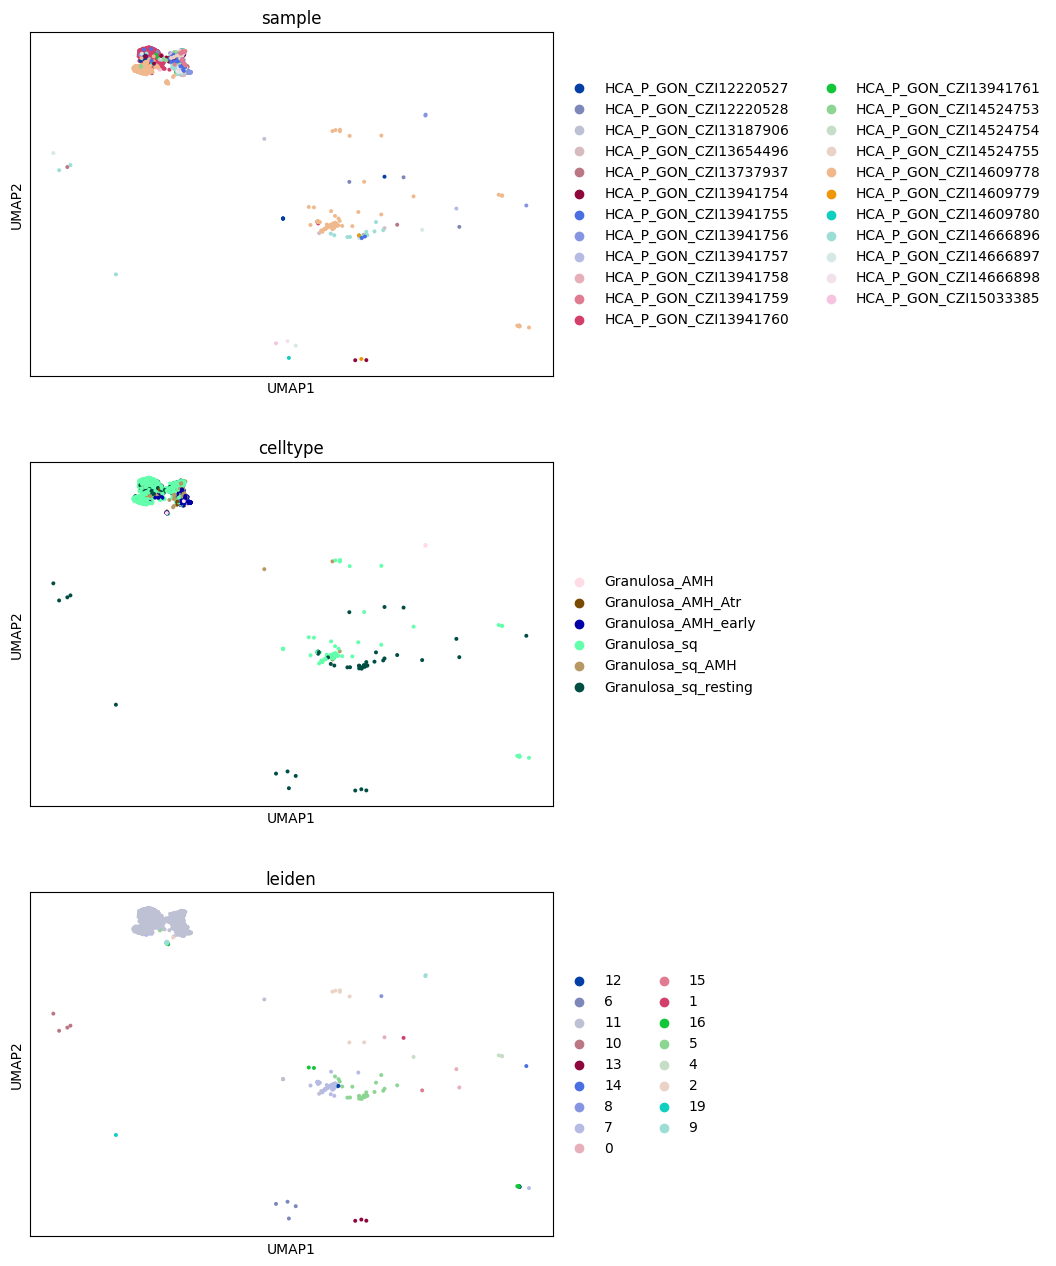

In [55]:
sc.pl.umap(data[data.obs.celltype.str.startswith('Granu'),:],color=['sample','celltype','leiden'],ncols=1)

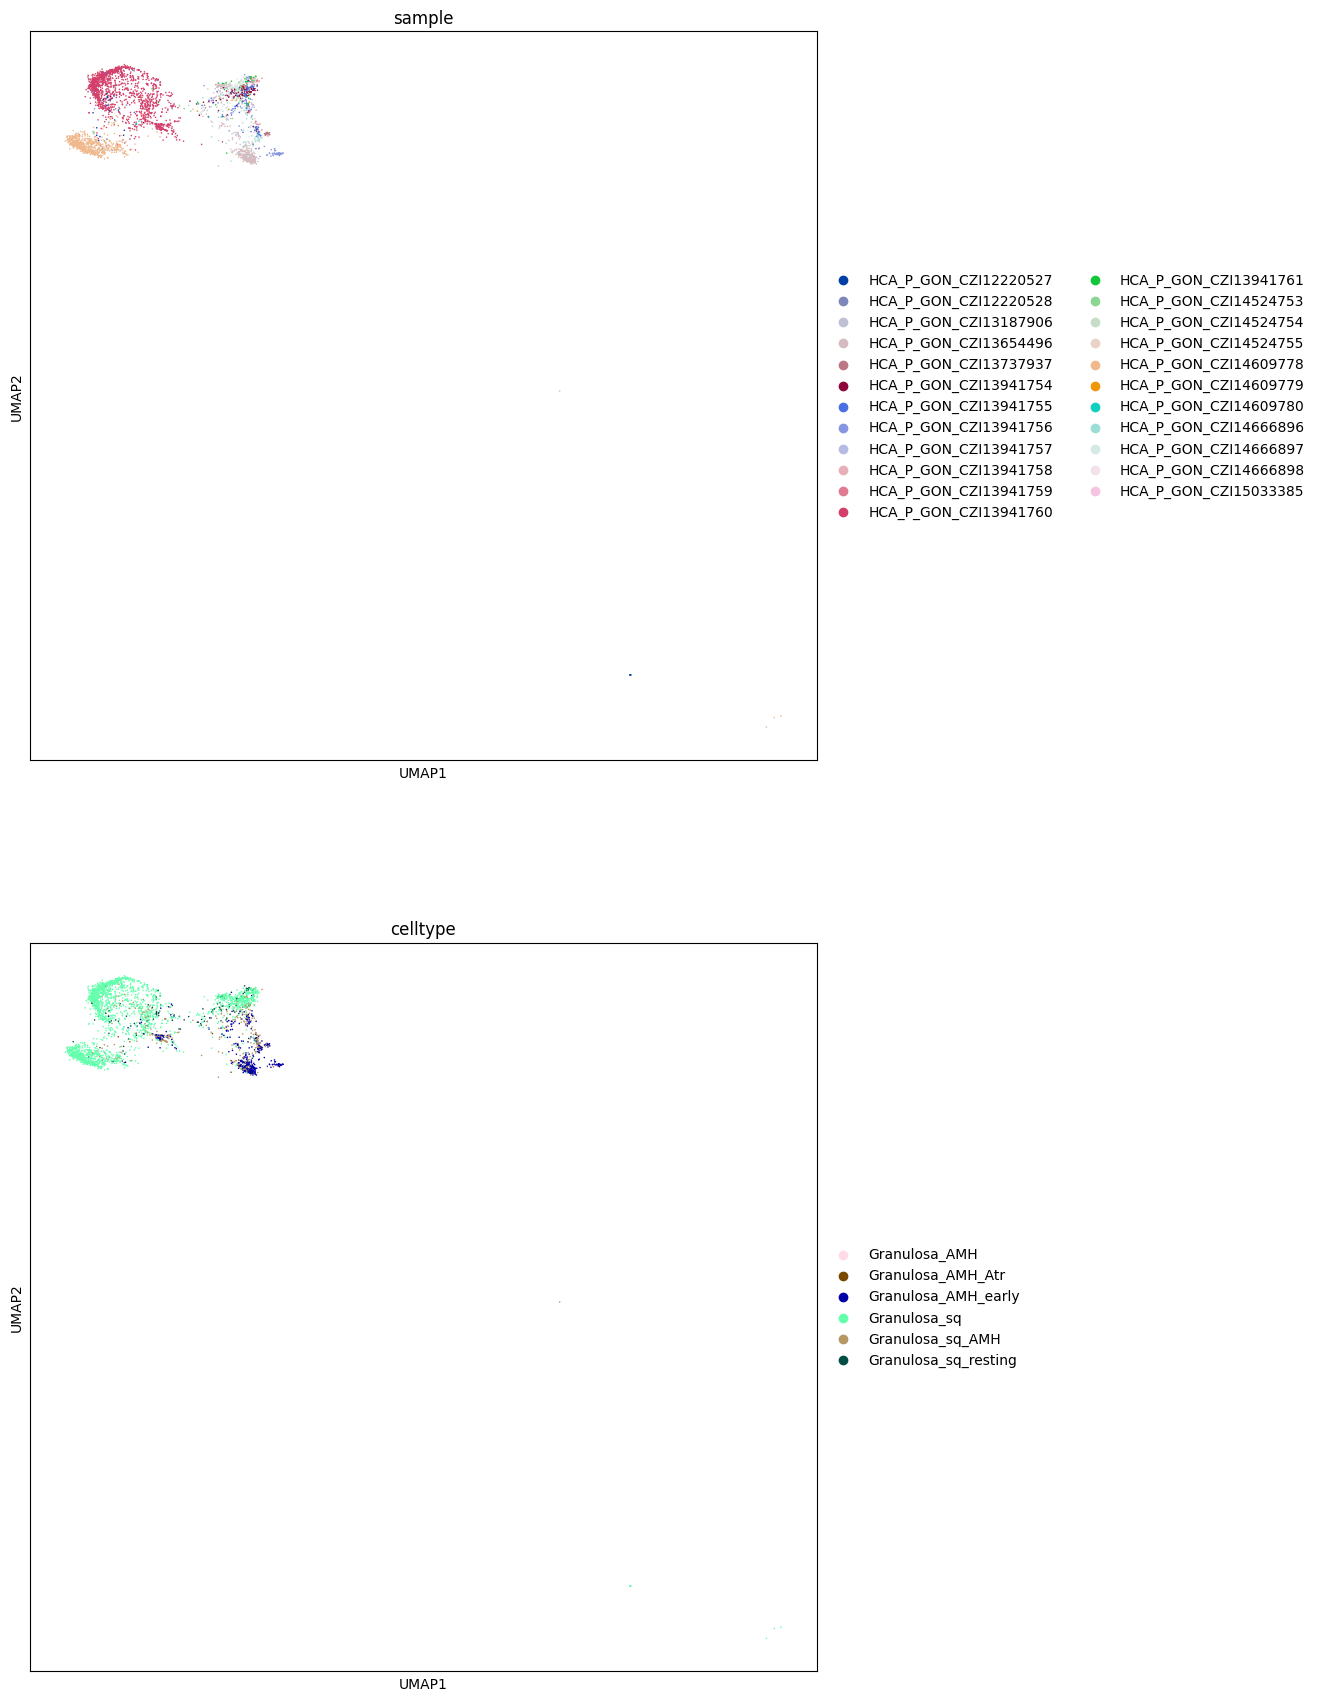

In [63]:
plt.rcParams['figure.figsize'] = [10, 10]
sc.pl.umap(data[data.obs.celltype.str.startswith('Granu') & (data.obs.leiden=='11'),:],color=['sample','celltype'],ncols=1,size=5)

In [128]:
#peaks = snap.read('../../data.lustre/atac/results2/subset_adatas/peak_mat.h5ad')
peaks = sc.read_h5ad('../../data.lustre/atac/results2/subset_adatas/peak_mat.h5ad')
peaks

AnnData object with n_obs × n_vars = 127101 × 44733
    obs: 'sample', 'leiden', 'celltype'

In [97]:
marker_peaks = snap.tl.marker_regions(peaks, groupby='celltype', pvalue=0.05)

In [116]:
len(marker_peaks['Granulosa_sq'])

264

In [105]:
{k:v for k,v in marker_peaks.items() if k.startswith('Granu')}

{'Granulosa_AMH': Index(['chr1:6970979-6971480', 'chr1:9080608-9081109', 'chr1:9364171-9364672',
        'chr1:9443969-9444470', 'chr1:10835821-10836322',
        'chr1:13434947-13435448', 'chr1:14598493-14598994',
        'chr1:14599168-14599669', 'chr1:17421344-17421845',
        'chr1:19466029-19466530',
        ...
        'chrX:51292466-51292967', 'chrX:76428053-76428554',
        'chrX:102125388-102125889', 'chrX:102126014-102126515',
        'chrX:126552607-126553108', 'chrX:129653913-129654414',
        'chrX:132441562-132442063', 'chrX:134622674-134623175',
        'chrX:151695549-151696050', 'chrX:152915349-152915850'],
       dtype='object', length=575),
 'Granulosa_AMH_Atr': Index(['chr1:1375206-1375707', 'chr1:1990156-1990657', 'chr1:2073401-2073902',
        'chr1:2381020-2381521', 'chr1:3471736-3472237', 'chr1:4778128-4778629',
        'chr1:5745059-5745560', 'chr1:6351757-6352258', 'chr1:6437959-6438460',
        'chr1:6811518-6812019',
        ...
        'chrX:1337923

In [112]:
peaks.obs.celltype.astype(str)[peaks.obs.celltype.str.startswith('Granu')].value_counts()

celltype
Granulosa_sq            2565
Granulosa_AMH_early      513
Granulosa_sq_AMH         382
Granulosa_sq_resting     176
Granulosa_AMH             29
Granulosa_AMH_Atr         11
Name: count, dtype: int64

In [117]:
marker_peaks_sq2sqAMH = snap.tl.marker_regions(peaks[peaks.obs.celltype.isin(['Granulosa_sq','Granulosa_sq_AMH','Granulosa_AMH_early','Granulosa_sq_resting']),:], groupby='celltype', pvalue=0.05)

In [118]:
marker_peaks_sq2sqAMH

{'Granulosa_AMH_early': Index(['chr1:1207959-1208460', 'chr1:1746193-1746694', 'chr1:3170998-3171499',
        'chr1:3471736-3472237', 'chr1:7752746-7753247', 'chr1:9539099-9539600',
        'chr1:9626906-9627407', 'chr1:11262438-11262939',
        'chr1:12495665-12496166', 'chr1:12548938-12549439',
        ...
        'chrX:101051868-101052369', 'chrX:119468917-119469418',
        'chrX:120497950-120498451', 'chrX:128396569-128397070',
        'chrX:131822202-131822703', 'chrX:131830772-131831273',
        'chrX:136250339-136250840', 'chrX:153686997-153687498',
        'chrX:154547038-154547539', 'chrX:155612710-155613211'],
       dtype='object', length=652),
 'Granulosa_sq': Index(['chr1:1908976-1909477', 'chr1:2391444-2391945', 'chr1:7783795-7784296',
        'chr1:8439348-8439849', 'chr1:11272885-11273386',
        'chr1:12595809-12596310', 'chr1:16112903-16113404',
        'chr1:21937191-21937692', 'chr1:25616369-25616870',
        'chr1:27350345-27350846',
        ...
        'c

In [129]:
gpeaks1 = peaks[peaks.obs.celltype.isin(['Granulosa_sq','Granulosa_sq_AMH']),:].copy()
sc.pp.normalize_total(gpeaks1)
sc.pp.log1p(gpeaks1)
gpeaks1.X.data

array([2.68618345, 1.08304212, 1.08304212, ..., 0.69026096, 0.69026096,
       0.69026096])

In [135]:
sc.tl.rank_genes_groups(gpeaks1, groupby='celltype',method='wilcoxon')
gpeaks1

AnnData object with n_obs × n_vars = 2947 × 44733
    obs: 'sample', 'leiden', 'celltype'
    uns: 'log1p', 'rank_genes_groups'

In [140]:
mp1 = sc.get.rank_genes_groups_df(gpeaks1,group=['Granulosa_sq','Granulosa_sq_AMH'])
mp1

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,Granulosa_sq,chr6:112562428-112562929,13.495881,1.880916,1.653671e-41,7.397366e-37
1,Granulosa_sq,chr2:240251031-240251532,13.386663,1.831147,7.235942e-41,1.618427e-36
2,Granulosa_sq,chr2:42906670-42907171,13.090013,3.770733,3.755467e-39,5.599777e-35
3,Granulosa_sq,chr17:8420230-8420731,12.040536,3.343689,2.175372e-33,2.432773e-29
4,Granulosa_sq,chr18:58828332-58828833,11.902733,1.933137,1.145338e-32,1.024688e-28
...,...,...,...,...,...,...
89461,Granulosa_sq_AMH,chr18:58828332-58828833,-11.902733,-1.933137,1.145338e-32,1.024688e-28
89462,Granulosa_sq_AMH,chr17:8420230-8420731,-12.040536,-3.343689,2.175372e-33,2.432773e-29
89463,Granulosa_sq_AMH,chr2:42906670-42907171,-13.090013,-3.770733,3.755467e-39,5.599777e-35
89464,Granulosa_sq_AMH,chr2:240251031-240251532,-13.386663,-1.831147,7.235942e-41,1.618427e-36


In [149]:
coors = mp1.names.str.split('[:-]')
mp1['chr'] = [x[0] for x in coors]
mp1['start'] = [int(x[1]) for x in coors]
mp1['end'] = [int(x[2]) for x in coors]
mp1

,group,names,scores,logfoldchanges,pvals,pvals_adj,chr,start,end
0,Granulosa_sq,chr6:112562428-112562929,13.495881,1.880916,1.653671e-41,7.397366e-37,chr6,112562428,112562929
1,Granulosa_sq,chr2:240251031-240251532,13.386663,1.831147,7.235942e-41,1.618427e-36,chr2,240251031,240251532
2,Granulosa_sq,chr2:42906670-42907171,13.090013,3.770733,3.755467e-39,5.599777e-35,chr2,42906670,42907171
3,Granulosa_sq,chr17:8420230-8420731,12.040536,3.343689,2.175372e-33,2.432773e-29,chr17,8420230,8420731
4,Granulosa_sq,chr18:58828332-58828833,11.902733,1.933137,1.145338e-32,1.024688e-28,chr18,58828332,58828833
...,...,...,...,...,...,...,...,...,...
89461,Granulosa_sq_AMH,chr18:58828332-58828833,-11.902733,-1.933137,1.145338e-32,1.024688e-28,chr18,58828332,58828833
89462,Granulosa_sq_AMH,chr17:8420230-8420731,-12.040536,-3.343689,2.175372e-33,2.432773e-29,chr17,8420230,8420731
89463,Granulosa_sq_AMH,chr2:42906670-42907171,-13.090013,-3.770733,3.755467e-39,5.599777e-35,chr2,42906670,42907171
89464,Granulosa_sq_AMH,chr2:240251031-240251532,-13.386663,-1.831147,7.235942e-41,1.618427e-36,chr2,240251031,240251532


In [142]:
pd.crosstab(mp1.pvals_adj<0.05,mp1.group)

group,Granulosa_sq,Granulosa_sq_AMH
pvals_adj,,
False,41406,41406
True,3327,3327


In [153]:
# AMH Chromosome 19: 2,249,309-2,252,073 forward strand.
mp1.loc[(mp1.chr == 'chr19') & (abs(mp1.start-2249309) < 50000),:]

,group,names,scores,logfoldchanges,pvals,pvals_adj,chr,start,end
5046,Granulosa_sq,chr19:2269124-2269625,2.274268,0.21011,0.022950,0.175925,chr19,2269124,2269625
5754,Granulosa_sq,chr19:2236139-2236640,2.111779,0.19261,0.034705,0.232059,chr19,2236139,2236640
83711,Granulosa_sq_AMH,chr19:2236139-2236640,-2.111779,-0.19261,0.034705,0.232059,chr19,2236139,2236640
84419,Granulosa_sq_AMH,chr19:2269124-2269625,-2.274268,-0.21011,0.022950,0.175925,chr19,2269124,2269625
